# 1. Pre-requisite
---



## Importing the Dependencies

---



In [2]:
!pip install seaborn

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import StratifiedKFold

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(7)

In [6]:
# Deprecated
# tf.logging.set_verbosity(tf.logging.INFO)

# Use the compatible version
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

## Data Collection and Analysis

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# loading the diabetes dataset to a pandas DataFrame
raw_df = pd.read_csv('diabetes_prediction_dataset.csv')

In [9]:
# pd.read_csv?

In [10]:
# printing the first 5 rows of the dataset
raw_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [11]:
raw_df.shape

(100000, 9)

In [12]:
raw_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
raw_df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [14]:
raw_df.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0            

In [15]:
raw_df.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
gender,Female,Female,Male,Female,Male,Female,Female,Female,Male,Female,...,Male,Male,Female,Female,Female,Female,Female,Male,Female,Female
age,80.0,54.0,28.0,36.0,76.0,20.0,44.0,79.0,42.0,32.0,...,39.0,22.0,26.0,40.0,36.0,80.0,2.0,66.0,24.0,57.0
hypertension,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
heart_disease,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
smoking_history,never,No Info,never,current,current,never,never,No Info,never,never,...,No Info,current,never,never,No Info,No Info,No Info,former,never,current
bmi,25.19,27.32,27.32,23.45,20.14,27.32,19.31,23.86,33.64,27.32,...,27.32,29.65,34.34,40.69,24.6,27.32,17.37,27.83,35.42,22.43
HbA1c_level,6.6,6.6,5.7,5.0,4.8,6.6,6.5,5.7,4.8,5.0,...,6.1,6.0,6.5,3.5,4.8,6.2,6.5,5.7,4.0,6.6
blood_glucose_level,140,80,158,155,155,85,200,85,145,100,...,100,80,160,155,145,90,100,155,100,90
diabetes,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [17]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [18]:
raw_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [19]:
pd.unique(raw_df.smoking_history)

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [20]:
pd.unique(raw_df.gender)

array(['Female', 'Male', 'Other'], dtype=object)

### For changing objects to integer

In [21]:
def change_string_to_int(column):
    variables=pd.unique(raw_df[column])
    for item in range(variables.size):
        raw_df[column]=[item if each==variables[item] else each for each in raw_df[column]]
    return raw_df[column]

In [22]:
raw_df["gender"]=change_string_to_int("gender")

In [23]:
raw_df["smoking_history"]=change_string_to_int("smoking_history")

In [24]:
raw_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [25]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


### Removing from the Data

#### distributions of each feature

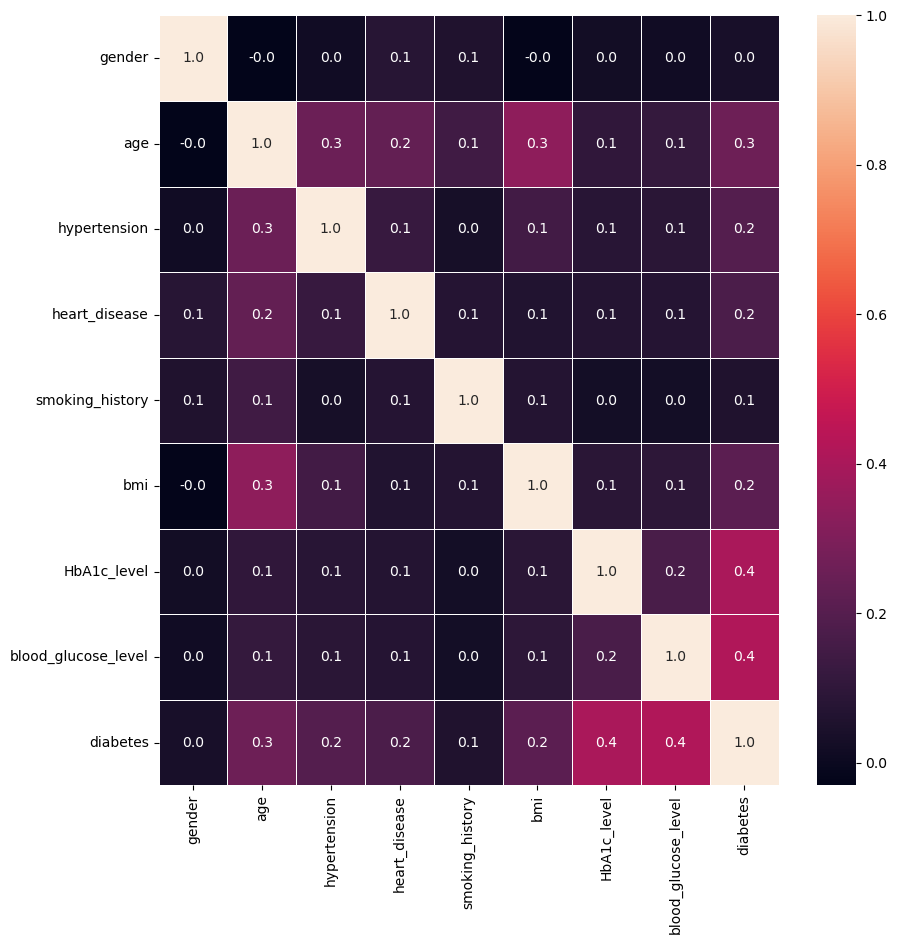

In [26]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(raw_df.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax,)
plt.show()

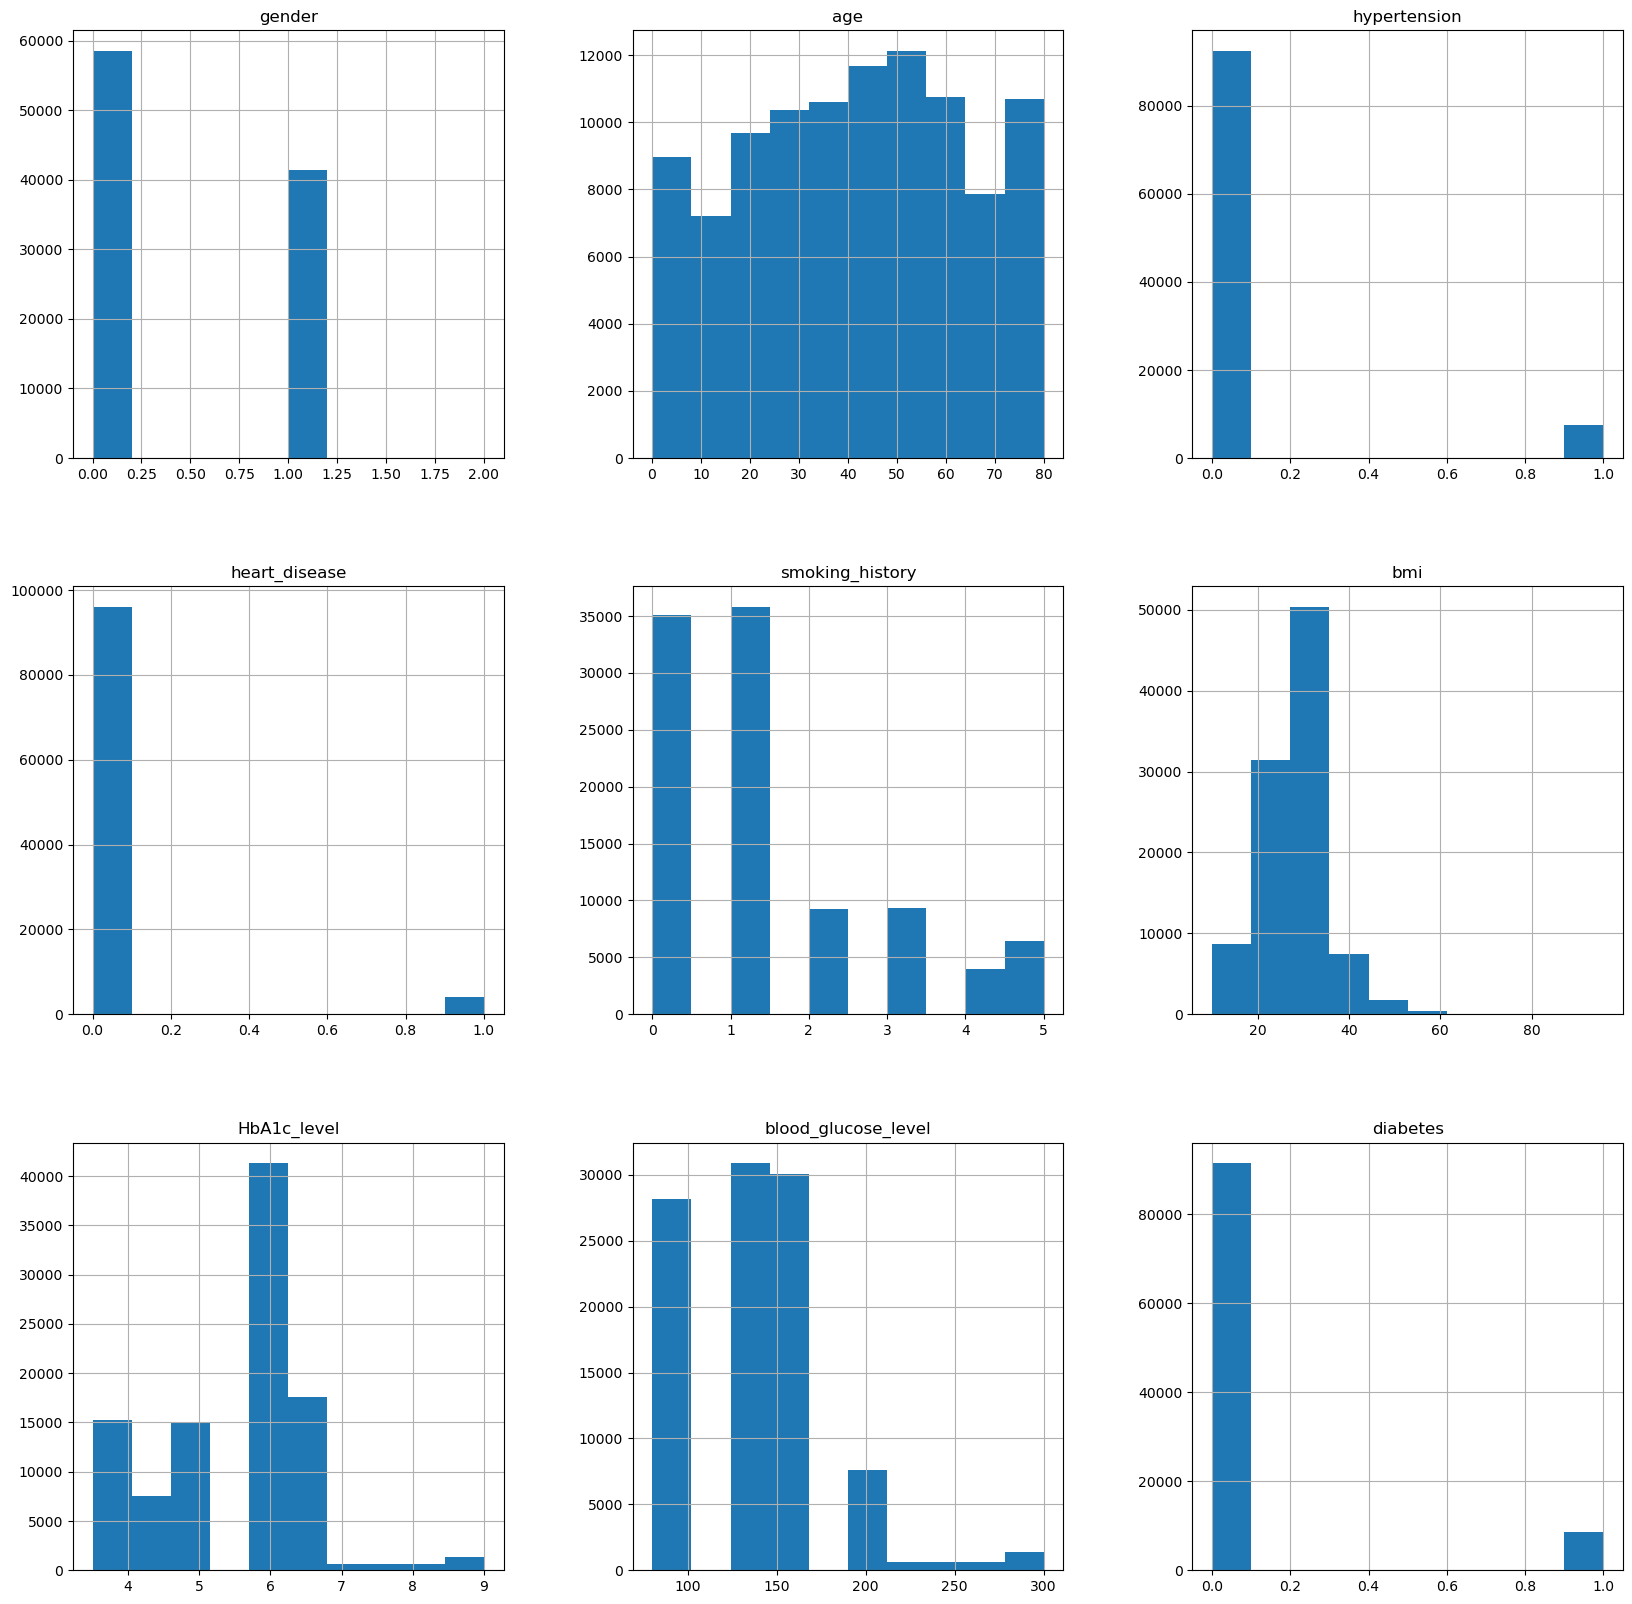

In [27]:
raw_df.hist(figsize=(20,20))
plt.show()

In [28]:
raw_df.drop("gender",axis=1,inplace=True)

In [29]:
raw_df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,0,25.19,6.6,140,0
1,54.0,0,0,1,27.32,6.6,80,0
2,28.0,0,0,0,27.32,5.7,158,0
3,36.0,0,0,2,23.45,5.0,155,0
4,76.0,1,1,2,20.14,4.8,155,0


### Transform the Data

In [30]:
raw_df.describe()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,1.306950,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,1.454501,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


### Normalization


In [31]:
raw_df = (raw_df - raw_df.min())/(raw_df.max()-raw_df.min())

In [32]:
raw_df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.000000,0.0,1.0,0.0,0.177171,0.563636,0.272727,0.0
1,0.674675,0.0,0.0,0.2,0.202031,0.563636,0.000000,0.0
2,0.349349,0.0,0.0,0.0,0.202031,0.400000,0.354545,0.0
3,0.449449,0.0,0.0,0.4,0.156863,0.272727,0.340909,0.0
4,0.949950,1.0,1.0,0.4,0.118231,0.236364,0.340909,0.0


In [33]:
raw_df["hypertension"]= raw_df["hypertension"].astype("int64")
raw_df["heart_disease"]= raw_df["heart_disease"].astype("int64")
raw_df["diabetes"]= raw_df["diabetes"].astype("int64")

In [34]:
raw_df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.000000,0,1,0.0,0.177171,0.563636,0.272727,0
1,0.674675,0,0,0.2,0.202031,0.563636,0.000000,0
2,0.349349,0,0,0.0,0.202031,0.400000,0.354545,0
3,0.449449,0,0,0.4,0.156863,0.272727,0.340909,0
4,0.949950,1,1,0.4,0.118231,0.236364,0.340909,0


## Check the proportion of the class from each feature

### Baseline (Zero-R)


In [35]:
print('- Total Instatnces')
print(len(raw_df.diabetes), end='\n\n')
print('- Values and Counts of the Class')
print(raw_df.diabetes.value_counts(), end='\n\n')
print('- Zero R of the Dataset')
print(raw_df.diabetes.value_counts().max()/len(raw_df.diabetes))

- Total Instatnces
100000

- Values and Counts of the Class
diabetes
0    91500
1     8500
Name: count, dtype: int64

- Zero R of the Dataset
0.915


# 2. Naive Models and Results

- Only changes of iteration, rest are default
- Used Models are below.
1. SVM
2. Logistic Regression
3. Random Forest
4. Decision Tree
5. KNN
6. Naive Bayes(Gaussian)
7. MLP
8. AdaBoost

## Separate target and variables

In [36]:
X_df = raw_df.drop(columns=['diabetes'])
y_df = raw_df['diabetes']

## Stratified cross validation
### Train_Test---------Fold: 5
### Train-Validation---Fold: 10 (10% for validation)

In [37]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [38]:
def skfCV(X, y, model, n_splits_outer=5, n_splits_inner=10):
    best_scores = []

    # Outer Stratified K-Fold (1-fold for testing, remaining for training)
    outer_fold = StratifiedKFold(n_splits=n_splits_outer, shuffle=True)

    outer_scores = []

    for i, (train_index_outer, test_index_outer) in enumerate(outer_fold.split(X, y), start=1):
        X_train_outer, X_test_outer = X.iloc[train_index_outer, :], X.iloc[test_index_outer, :]
        y_train_outer, y_test_outer = y.iloc[train_index_outer], y.iloc[test_index_outer]

        inner_scores = []

        # Inner Stratified K-Fold (with 10% validation)
        inner_fold = StratifiedKFold(n_splits=n_splits_inner, shuffle=True)

        for j, (train_index_inner, val_index) in enumerate(inner_fold.split(X_train_outer, y_train_outer), start=1):
            X_train_inner, X_val = X_train_outer.iloc[train_index_inner, :], X_train_outer.iloc[val_index, :]
            y_train_inner, y_val = y_train_outer.iloc[train_index_inner], y_train_outer.iloc[val_index]

            # Normalize input features
            scaler = StandardScaler()
            X_train_inner_scaled = scaler.fit_transform(X_train_inner)
            X_val_scaled = scaler.transform(X_val)

            # Fit the model
            model.fit(X_train_inner_scaled, y_train_inner, epochs=150, batch_size=10, verbose=0)

            # Predict on the validation set
            y_pred_val = model.predict(X_val_scaled)
            y_pred_val = (y_pred_val > 0.5).astype(int)

            # Calculate accuracy and F1 score for each fold
            acc_fold = accuracy_score(y_val, y_pred_val)
            f1_fold = f1_score(y_val, y_pred_val)

            # Print or store accuracy and F1 score for each fold
            print(f'Fold {j}: Accuracy: {acc_fold:.4f}, F1 Score: {f1_fold:.4f}')

            inner_scores.append((acc_fold, f1_fold))

        # After the inner loop, calculate the mean accuracy and F1 score
        mean_acc_inner = np.mean([score[0] for score in inner_scores])
        mean_f1_inner = np.mean([score[1] for score in inner_scores])

        # Test on the outer test set
        X_test_outer_scaled = scaler.transform(X_test_outer)
        y_pred_test = model.predict(X_test_outer_scaled)
        y_pred_test = (y_pred_test > 0.5).astype(int)

        acc_test = accuracy_score(y_test_outer, y_pred_test)
        f1_test = f1_score(y_test_outer, y_pred_test)

        # Store the outer and inner scores for analysis
        outer_scores.append((acc_test, mean_acc_inner, f1_test, mean_f1_inner))

        # Print or store accuracy, mean accuracy, and F1 score for the outer fold
        print(f'\nTest Fold {i}: Test Accuracy: {acc_test:.4f}, Mean(train_validation) Accuracy: {mean_acc_inner:.4f}, Test F1 Score: {f1_test:.4f}, Mean(train_validation) F1 Score: {mean_f1_inner:.4f}\n')

    # After the outer loop, calculate the mean test accuracy and F1 score
    mean_acc_outer = np.mean([score[0] for score in outer_scores])
    mean_f1_outer = np.mean([score[2] for score in outer_scores])

    best_scores.append((mean_acc_outer, mean_f1_outer))

    print(f'Mean Test Accuracy: {mean_acc_outer:.4f}, Mean Test F1 Score: {mean_f1_outer:.4f}\n')

    return best_scores

In [39]:
# Assuming X_df has 8 features
model = create_model(input_dim=X_df.shape[1])

In [40]:
model_all = skfCV(X_df, y_df, model)



250/250 [==============================] - 1s 2ms/step
Fold 1: Accuracy: 0.9706, F1 Score: 0.7958
250/250 [==============================] - 1s 3ms/step
Fold 2: Accuracy: 0.9739, F1 Score: 0.8209
250/250 [==============================] - 1s 2ms/step
Fold 3: Accuracy: 0.9708, F1 Score: 0.7951
250/250 [==============================] - 0s 2ms/step
Fold 4: Accuracy: 0.9725, F1 Score: 0.8094
250/250 [==============================] - 0s 2ms/step
Fold 5: Accuracy: 0.9710, F1 Score: 0.7972
250/250 [==============================] - 0s 2ms/step
Fold 6: Accuracy: 0.9721, F1 Score: 0.8069
250/250 [==============================] - 1s 2ms/step
Fold 7: Accuracy: 0.9728, F1 Score: 0.8101
250/250 [==============================] - 1s 4ms/step
Fold 8: Accuracy: 0.9704, F1 Score: 0.7923
250/250 [==============================] - 0s 2ms/step
Fold 9: Accuracy: 0.9684, F1 Score: 0.7759
250/250 [==============================] - 0s 2ms/step
Fold 10: Accuracy: 0.9764, F1 Score: 0.8402
625/625 [========